In [ ]:
%matplotlib notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os 
from tqdm import tqdm

import multiprocessing as mp


In [ ]:
from simulation import *
from visualizer import renderParticles, drawTree

In [ ]:
plt.ioff()

In [5]:
# some constants ... 
L = 2
n = 10
m = 1
theta = 0 
softening = 0.01

<IPython.core.display.Javascript object>


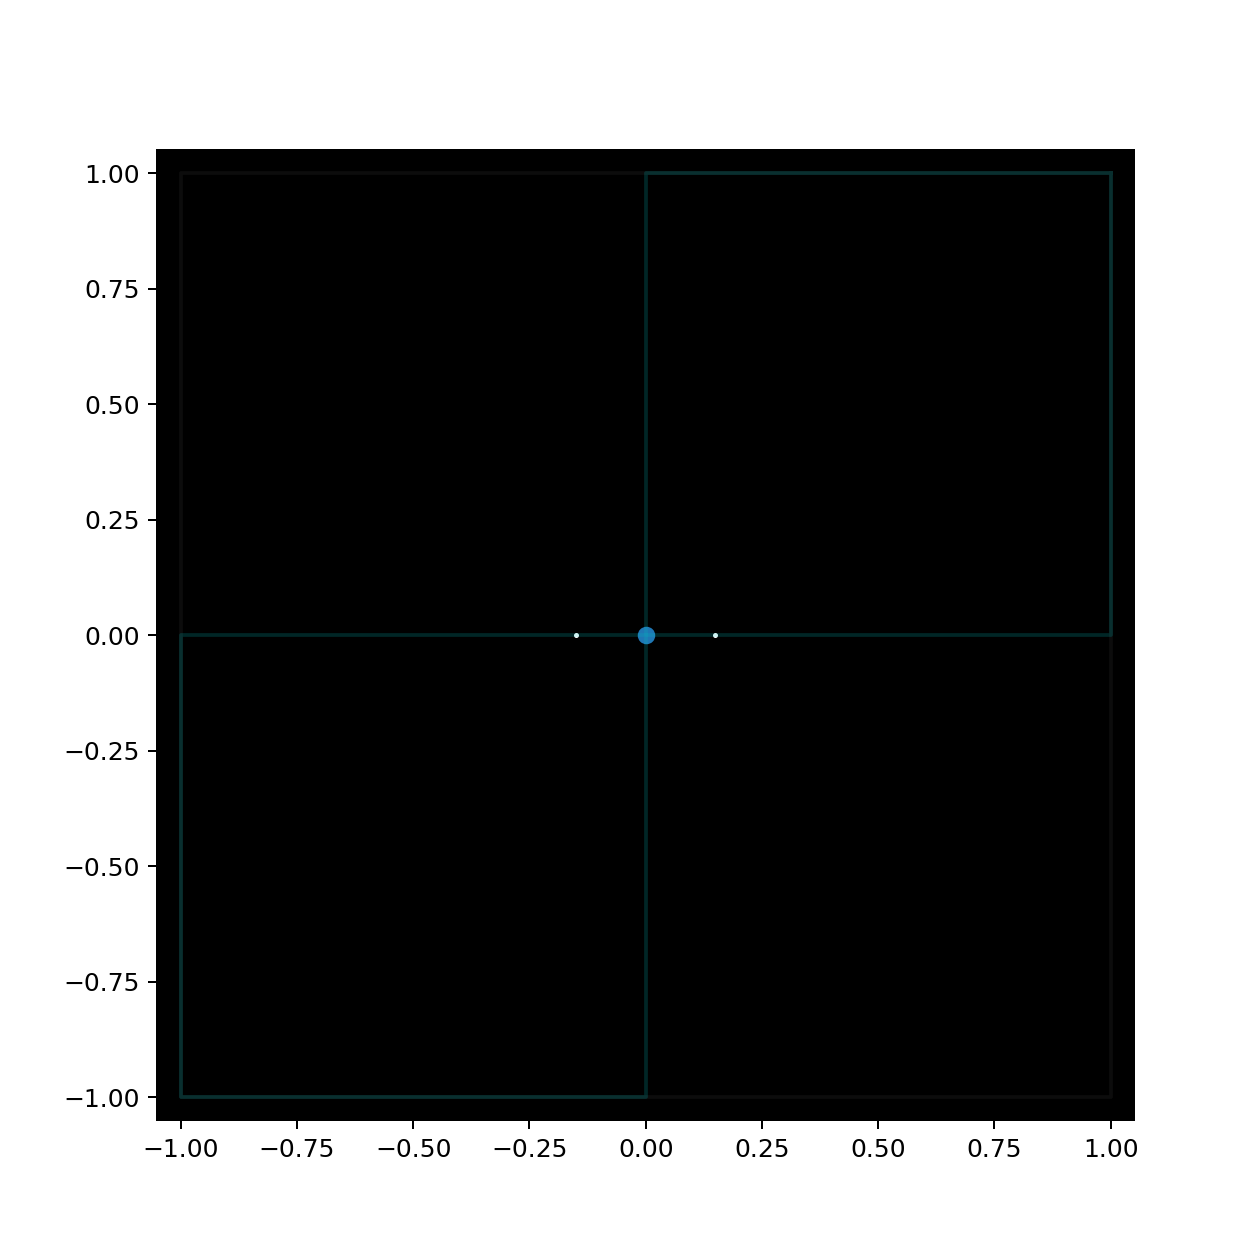

In [6]:
# random particles originally from (0, 1), scaled to (0, 2), shifted to (-1, 1)
n = 2
particles = np.random.random((n, 4)) * L - L / 2 
particles[:, 2] = 0 # np.random.random(n)
particles[:, 3] = 0 # np.random.random(n) - 0.5
particles = np.array([[0.15, 1e-10, 0, 0], [-0.15, -1e-10, 0, 0]])


fig, ax = plt.subplots(figsize=(7, 7), dpi=100)
ax.set_facecolor("black")
plt.scatter(particles[:, 0], particles[:, 1], s = 1, c='white')

plt.xlim(-1.05, 1.05)
plt.ylim(-1.05, 1.05)

# we start with a simple leaf (root) 
root = leaf()
# which we then can immediately turn into a tree 

for p in particles: 
    root = assignParticle(p[0:2], root)


plt.scatter(root.com[0], root.com[1])
# plt.scatter(root.ul.com[0], root.ul.com[1])
#plt.scatter(root.ll.com[0], root.ll.com[1])

drawTree(ax, root)

plt.show()


In [7]:
np.random.normal(0, 0.2, (n, 4))

array([[ 7.43417654e-02,  1.60434918e-01, -2.12722455e-01,
        -1.33616747e-02],
       [ 2.56742810e-02,  2.68013558e-01,  2.13111163e-05,
        -7.28667555e-02]])

In [8]:
# random particles originally from (0, 1), scaled to (0, 2), shifted to (-1, 1)
n = 100
# particles = np.random.normal((n, 4)) * 0.5 - 0.5 / 2 # L - L / 2 
particles = np.random.normal(0, 0.2, (n, 4))
particles[:, 2] = 0 # np.random.random(n)
particles[:, 3] = 0 # np.random.random(n) - 0.5
# particles = np.array([[0.05, 1e-10, 0, 0.1], [-0.05, -1e-10, 0, -0.1]])

tpoints, particles_list, trees = leapfrog(particles.copy(), t_start=0, t_end=10, N=1e3, L=2)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:54<00:00,  8.71it/s]


In [9]:
import time 
from natsort import natsorted
import moviepy.video.io.ImageSequenceClip

tstart = time.time() 

print('[{:.2f}] Creating plot directory ...'.format(time.time() - tstart))
new_dir = '{}/{}'.format(os.path.abspath(os.getcwd()), 'L{}n{}'.format(L, n))
if not os.path.isdir(new_dir):
    os.mkdir(os.path.join(new_dir))

print('[{:.2f}] Initializing multiprocessing ...'.format(time.time() - tstart))
n_cpu = mp.cpu_count()
pool = mp.Pool(processes=n_cpu)

mp_trees = np.array_split(trees, n_cpu)
mp_particles = np.array_split(particles_list, n_cpu)
mp_tpoints = np.array_split(np.arange(len(tpoints)), n_cpu)
    
print('[{:.2f}] Creating plots ...'.format(time.time() - tstart))
for i in range(n_cpu):
    pool.apply_async(renderParticles, args=(mp_particles[i], mp_trees[i], mp_tpoints[i], new_dir))

pool.close()
pool.join()
print('[{:.2f}] Multiprocess concluded ...'.format(time.time() - tstart))


print('[{:.2f}] Creating video ...'.format(time.time() - tstart))

fps=30 #number of frames per second
image_files = natsorted([os.path.join(new_dir,img) for img in os.listdir(new_dir) if img.endswith(".png")], reverse=False)
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile('test.mp4')

print('[{:.2f}] Video created ...'.format(time.time() - tstart))

_ = [os.remove(image_file) for image_file in image_files]
os.rmdir(new_dir)
print('[{:.2f}] Directory cleaned ...'.format(time.time() - tstart))


[0.00] Creating plot directory ...
[0.00] Initializing multiprocessing ...
[0.05] Creating plots ...
[108.35] Multiprocess concluded ...
[108.35] Creating video ...
Moviepy - Building video test.mp4.
Moviepy - Writing video test.mp4



Moviepy - Done !
Moviepy - video ready test.mp4
[148.02] Video created ...
[148.06] Directory cleaned ...


In [ ]:
root.ur.com